In [24]:
from random import randint
import pandas as pd
import numpy as np
from datetime import datetime
import time
from collections import defaultdict
import matplotlib.pyplot as plt

import os
import _ParlayANNpy as pann
import numpy as np
import wrapper as wp
from scipy.sparse import csr_matrix

In [20]:
FERN_DATA_DIR = "/ssd1/anndata/bigann/"
AWARE_DATA_DIR = "/ssd1/data/bigann/"

DATA_DIR = FERN_DATA_DIR
POINTS_PATH = DATA_DIR + "data/yfcc100M/base.10M.u8bin.crop_nb_10000000"
FILTER_PATH = DATA_DIR + 'data/yfcc100M/base.metadata.10M.spmat'

ds = wp.FilteredDataset(POINTS_PATH, FILTER_PATH)

samples = 20
# try multiprocessing - spawn 192 processes, each one samples a point

columns = ['Point', 'Filter1 Avg Dist', 'Filter2 Avg Dist', 'Join Avg Dist', 'Filter 1', 'Filter 2']
df = pd.DataFrame(index=range(samples), columns=columns, dtype=float)


Detected 10000000 points with dimension 192


In [21]:
# Repeat the following steps many times:
for i in range(samples):
    # 1. Select a random point (try the query set after the general dataset)
    point = randint(0, ds.size()-1)
    filters = ds.get_point_filters(point)
    while len(filters) < 2:
        point = randint(0, ds.size()-1) 
        filters = ds.get_point_filters(point)

    # 2. Select two random filters associated with that point
    filter1 = randint(0, len(filters) - 1)
    filter2 = randint(0, len(filters) - 1)
    while filter1 == filter2:
        filter2 = randint(0, len(filters) - 1)
    filter1 = filters[filter1]
    filter2 = filters[filter2]

    # 3. Compute the average distance between this point and Filter 1
    filter1_points = ds.get_filter_points(filter1)
    avg_dist1 = 0
    for p in filter1_points:
        if p != point:
            avg_dist1 += ds.distance(point, p)
    avg_dist1 /= (len(filter1_points)-1)
    print("Filter 1", avg_dist1)

    # 4. Compute the average distance between this point and Filter 2
    filter2_points = ds.get_filter_points(filter2)
    avg_dist2 = 0
    for p in filter2_points:
        if p != point:
            avg_dist2 += ds.distance(point, p)
    avg_dist2 /= (len(filter2_points)-1)
    print("Filter 2", avg_dist2)

    # 5. Compute the average distance between this point and points in Filter 1 AND Filter 2
    join_filters_points = ds.get_filter_intersection(filter1, filter2)
    avg_join_dist = 0
    for p in join_filters_points:
        if p != point:
            avg_join_dist += ds.distance(p, point)
    if len(join_filters_points) > 1:
        avg_join_dist /= (len(join_filters_points)-1)
    print("Joined", avg_join_dist)

    # 6. Store this data into a pandas dataframe along with as much other information as possible
    df.at[i, 'Point'] = point
    df.at[i, 'Filter1 Avg Dist'] = avg_dist1
    df.at[i, 'Filter2 Avg Dist'] = avg_dist2
    df.at[i, 'Join Avg Dist'] = avg_join_dist
    df.at[i, 'Filter 1'] = filter1
    df.at[i, 'Filter 2'] = filter2

Filter 1 4771781.05393805
Filter 2 4871499.193275239
Joined 4777241.829480699
Filter 1 4271249.749320968
Filter 2 4252564.3270279
Joined 4258543.158186746
Filter 1 4965585.454780533
Filter 2 5016140.943467262
Joined 4804711.610620059
Filter 1 3984466.7424285724
Filter 2 4073838.1161499503
Joined 4055863.870648127
Filter 1 3929890.2641459545
Filter 2 4039300.920592521
Joined 4053310.888888889
Filter 1 3912858.6803292483
Filter 2 3968495.284984742
Joined 3919363.396571305
Filter 1 3632206.1764705884
Filter 2 3892787.486721535
Joined 3632206.1764705884
Filter 1 3899469.3768569194
Filter 2 3969118.0456708493
Joined 3979974.140672783
Filter 1 4253889.223672759
Filter 2 4318278.774255241
Joined 4253709.019213974
Filter 1 3912012.406957482
Filter 2 3904428.1430179207
Joined 4019969.3498233217
Filter 1 3840808.190658343
Filter 2 2943314.6851119893
Joined 2907857.285714286
Filter 1 3920774.274568416
Filter 2 3884711.2188954935
Joined 3895592.606637054
Filter 1 4030459.9370985962
Filter 2 403689

No handles with labels found to put in legend.


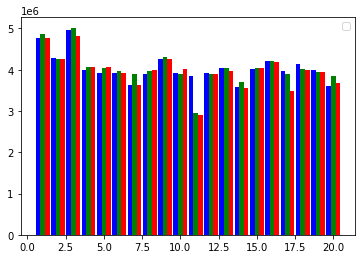

In [22]:
# Create histogram of the average distances (using matplotlib or seaborn)
df['Point'] = df['Point'].astype(int)
df['Filter 1'] = df['Filter 1'].astype(int)
df['Filter 2'] = df['Filter 2'].astype(int)
# print(df)

x = np.arange(1, samples+1)

y = list(df['Filter1 Avg Dist'])
z = list(df['Filter2 Avg Dist'])
k = list(df['Join Avg Dist'])

# print(y,z,k)

ax = plt.subplot(111)
w = 0.3
ax.bar(x-w, y, width=w, color='b', align='center')
ax.bar(x, z, width=w, color='g', align='center')
ax.bar(x+w, k, width=w, color='r', align='center')
ax.legend(loc='upper right')
# ax.autoscale(tight=True)

plt.show()